<a href="https://colab.research.google.com/github/guidomoor/FEA-ML/blob/main/Normalized_NN_for_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RF prediction**

the dataframe is extracted from single element simulations where multiple nodes are being displaced (here in the picture nodes 3 and 4). The element is a 2D plain stress element fully integrated:

4--------3
         
1--------2


*   U is a 8x1 array = [u11, u12, u21, u22, ..., u44]
*   COORD is a 8x1 array = [coord11, coord12, coord21, coord22, ..., coord44]
*   RF is a 8x1 array = [F11, F12, ..., F44]

In total is therefore a 16 inputs - 8 outputs system

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
 #Create a model that inherits nn.Module
 class Model(nn.Module):
  #Input Layer (4 features of flower) -->
  #Hidden Layer 1 (#of neurons) -->
  #H2 --> Output
  #(3 classes of flowers)
  def __init__(self, in_features=16, h1=32, h2=64, h3=32, out_features=8):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  #this function is pushing the information forward through the layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectify linear unit function relu
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

In [21]:
torch.manual_seed(42)
model = Model()

In [22]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')
    my_df = pd.read_csv(filename, header=None)  # Read the CSV file into a DataFrame


Saving NN_for_RF_normalized.csv to NN_for_RF_normalized (1).csv
Uploaded file: NN_for_RF_normalized (1).csv


In [23]:
my_df


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.5,-0.5,0.5,-0.5,0.5,0.5,-0.50,-0.50,-1.190476e-32,-9.157509e-34,...,2.014652e-32,1.648352e-32,0.240741,0.018519,-0.018519,-0.240741,0.666667,0.074074,-0.407407,-0.333333
1,0.5,-0.5,0.5,-0.5,0.5,0.5,-0.50,-0.50,-1.167582e-32,2.060440e-33,...,2.426740e-32,2.152015e-32,0.236111,-0.041667,0.041667,-0.236111,0.685185,0.240741,-0.490741,-0.435185
2,0.5,-0.5,0.5,-0.5,0.5,0.5,-0.50,-0.50,-1.144689e-32,5.036630e-33,...,2.838828e-32,2.655678e-32,0.231481,-0.101852,0.101852,-0.231481,0.703704,0.407407,-0.574074,-0.537037
3,0.5,-0.5,0.5,-0.5,0.5,0.5,-0.50,-0.50,-1.121795e-32,8.012820e-33,...,3.250916e-32,3.159341e-32,0.226852,-0.162037,0.162037,-0.226852,0.722222,0.574074,-0.657407,-0.638889
4,0.5,-0.5,0.5,-0.5,0.5,0.5,-0.50,-0.50,-1.098901e-32,1.098901e-32,...,3.663004e-32,3.663004e-32,0.222222,-0.222222,0.222222,-0.222222,0.740741,0.740741,-0.740741,-0.740741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.3,-1.0,0.3,-0.7,1.0,0.5,-0.45,-0.84,6.296296e-01,1.000000e+00,...,1.250149e-32,3.403757e-32,-0.186834,0.510843,-0.356210,0.032201,0.566906,0.374217,-0.252808,-0.688315
1756,0.3,-1.0,0.3,-0.7,1.0,0.5,-0.45,-0.84,6.296296e-01,4.444444e-01,...,1.329838e-32,3.002760e-32,0.263563,-0.031368,-0.041492,-0.190703,0.737314,0.138834,-0.268923,-0.607225
1757,0.3,-1.0,0.3,-0.7,1.0,0.5,-0.45,-0.84,6.296296e-01,4.444444e-01,...,1.739433e-32,3.379749e-32,0.235731,-0.100393,0.021188,-0.156526,0.745998,0.289214,-0.351752,-0.683460
1758,0.3,-1.0,0.3,-0.7,1.0,0.5,-0.45,-0.84,6.296296e-01,4.444444e-01,...,2.149028e-32,3.756737e-32,0.207899,-0.169418,0.083868,-0.122349,0.754682,0.439595,-0.434581,-0.759696


In [24]:
# Assuming my_df has 44 columns
X = my_df.iloc[:, :16]  # Select the first 8 columns (Coord): input
y = my_df.iloc[:, 16:]   # Select the last 36 columns (Ke): output
#convert to numpy arrays
#Data used in the NN
X = X.values
y = y.values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Train Test Slip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
# Convert your datasets to PyTorch tensors
X_train = torch.FloatTensor(X_train)  # Inputs should be Float
X_test = torch.FloatTensor(X_test)    # Inputs should be Float

# If y_train and y_test are initially NumPy arrays
y_train = np.array(y_train, dtype=float)  # Ensure they are float arrays
y_test = np.array(y_test, dtype=float)    # Ensure they are float arrays

# Convert to PyTorch FloatTensor
y_train = torch.FloatTensor(y_train)  # Convert to FloatTensor
y_test = torch.FloatTensor(y_test)    # Convert to FloatTensor



In [28]:
print(f'X train: {X_train}')
print(f'X test: {X_test}')
print(f'y train: {y_train}')
print(f'y test: {y_test}')

X train: tensor([[ 5.0000e-01, -5.0000e-01,  5.0000e-01,  ...,  3.7037e-01,
          1.3507e-32,  3.5027e-32],
        [ 5.0000e-01, -3.0000e-01,  5.0000e-01,  ...,  2.2963e-01,
          1.3104e-32,  1.1074e-32],
        [ 2.6000e-01, -2.6000e-01,  2.6000e-01,  ...,  5.9259e-01,
          1.8864e-32,  4.1941e-32],
        ...,
        [ 2.6000e-01, -2.6000e-01,  2.6000e-01,  ...,  5.9259e-01,
          1.7582e-32,  3.3700e-32],
        [ 5.0000e-01, -3.0000e-01,  5.0000e-01,  ...,  8.1481e-02,
          1.7099e-33,  4.5929e-33],
        [ 2.6000e-01, -2.6000e-01,  2.6000e-01,  ...,  5.9259e-01,
          2.1978e-32,  3.8095e-32]])
X test: tensor([[ 2.6000e-01, -2.6000e-01,  2.6000e-01,  ...,  4.4444e-01,
          1.8681e-32,  3.4066e-32],
        [ 2.6000e-01, -2.6000e-01,  2.6000e-01,  ...,  4.4444e-01,
          1.5751e-32,  3.5531e-32],
        [ 3.0000e-01, -1.0000e+00,  3.0000e-01,  ...,  6.2963e-01,
          6.0012e-33,  2.4120e-32],
        ...,
        [ 3.0000e-01, -1.0000

**Normalized Dataset Z-norm**

In [29]:
#Set the criterion of model to measure the error
criterion = nn.MSELoss()  # Use MSE loss for regression
#Choose an Optimizer - Adam Optimizer, learning rate (lr).
#learning rate is used in case the error does not go down
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [30]:
#Train the model:
# Epochs: (one run through all the training data in the network)
epochs = 400
losses = []

for i in range(epochs):
    # Forward pass: use normalized X_train as input
    y_pred = model.forward(X_train)  # Use normalized inputs

    # Measure the loss/error using normalized y_train
    loss = criterion(y_pred, y_train)  # Compare with normalized targets

    # Keep track of losses
    losses.append(loss.detach().numpy())

    # Print the losses (for tracking training progress)
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    # Backpropagation: update the model's weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.1691734939813614
Epoch: 10 Loss: 0.1334717869758606
Epoch: 20 Loss: 0.09719375520944595
Epoch: 30 Loss: 0.059204623103141785
Epoch: 40 Loss: 0.045712389051914215
Epoch: 50 Loss: 0.03987076133489609
Epoch: 60 Loss: 0.037075672298669815
Epoch: 70 Loss: 0.03345021978020668
Epoch: 80 Loss: 0.029394978657364845
Epoch: 90 Loss: 0.024858687072992325
Epoch: 100 Loss: 0.019574115052819252
Epoch: 110 Loss: 0.013972640968859196
Epoch: 120 Loss: 0.009861334227025509
Epoch: 130 Loss: 0.007868201471865177
Epoch: 140 Loss: 0.006441737525165081
Epoch: 150 Loss: 0.005120893940329552
Epoch: 160 Loss: 0.003941643517464399
Epoch: 170 Loss: 0.0030084208119660616
Epoch: 180 Loss: 0.0024227690882980824
Epoch: 190 Loss: 0.0020855169277638197
Epoch: 200 Loss: 0.0018385382136330009
Epoch: 210 Loss: 0.0016310788923874497
Epoch: 220 Loss: 0.0014628798235207796
Epoch: 230 Loss: 0.0013199017848819494
Epoch: 240 Loss: 0.0011932789348065853
Epoch: 250 Loss: 0.0010803192853927612
Epoch: 260 Loss: 0.00

Text(0.5, 0, 'Epoch')

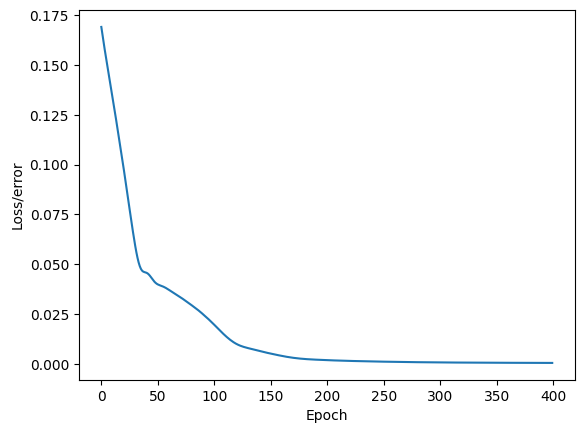

In [31]:
#Plot Loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [32]:
# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Get predictions
    y_preds = model(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = torch.mean(torch.abs(y_preds - y_test))
    print(f'MAE: {mae.item():.4f}')

    # Calculate Mean Squared Error (MSE)
    mse = torch.mean((y_preds - y_test) ** 2)
    print(f'MSE: {mse.item():.4f}')

    # Calculate R-squared
    ss_total = torch.sum((y_test - torch.mean(y_test)) ** 2)
    ss_residual = torch.sum((y_test - y_preds) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f'R-squared: {r_squared.item():.4f}')


MAE: 0.0148
MSE: 0.0005
R-squared: 0.9963


In [33]:
new_input = torch.tensor([[0.3, -1, 0.3, -0.7, 1, 0.5, -0.45, -0.84, 0.6296, 0.4444, 0, 0, 0.8148, 1, 0, 0]])
max_norm = 66758.24

# Disable gradient calculation
with torch.no_grad():
    model.eval()
    # Prediction for new input
    y_pred = model(new_input)
    y_pred_real = y_pred * max_norm
    print(f'Prediction: {y_pred_real}')


    # Print the denormalized prediction
    print(f' Prediction: {y_pred}')


Prediction: tensor([[ 14297.2861,  -8473.4209,   2978.2234,  -8767.8086,  48372.6406,
          41532.5234, -34255.1523, -56190.7266]])
 Prediction: tensor([[ 0.2142, -0.1269,  0.0446, -0.1313,  0.7246,  0.6221, -0.5131, -0.8417]])


In [34]:
# Extracting all weights and biases
for name, param in model.named_parameters():
    if param.requires_grad:  # Only if you want trainable parameters
        print(f'Layer: {name}, Weights: {param.data.numpy()}')


Layer: fc1.weight, Weights: [[ 0.25236     0.16918877  0.00265744  0.1965913  -0.02832526  0.08395796
  -0.18621014  0.13291925  0.321674   -0.19668016  0.21729904  0.04678982
   0.3085686   0.10047468  0.12054703 -0.03529775]
 [ 0.19272146  0.03695223 -0.11670998  0.06372458 -0.11518416 -0.02931821
  -0.10153958  0.16584274 -0.19734254 -0.11525258 -0.07059368 -0.15031812
   0.02359578 -0.24691978  0.22577727 -0.21236706]
 [ 0.22650723  0.00531636 -0.04767583  0.12493061  0.07056264  0.22836086
  -0.01020289 -0.10296484  0.15771976 -0.08195899  0.10521439  0.22320554
   0.27138248 -0.09059316  0.14431617  0.04473156]
 [ 0.12695876 -0.15237626 -0.24747711 -0.09659013 -0.19175571  0.20513472
   0.07200783  0.10355338  0.07906529 -0.00434899  0.19565207 -0.1776284
   0.01574093 -0.17063504  0.077088   -0.08609557]
 [ 0.13490193 -0.08070279  0.2656458  -0.16153955 -0.14187667 -0.13886546
   0.1579647   0.10166725  0.36006936 -0.2773623  -0.24796903 -0.19559094
  -0.12063809  0.20908102  0.

In [35]:
# Access weights directly from each layer
weights_fc1 = model.fc1.weight.data.numpy()
weights_fc2 = model.fc2.weight.data.numpy()
#weights_fc3 = model.fc3.weight.data.numpy()
weights_out = model.out.weight.data.numpy()

print("Weights from fc1:", weights_fc1)
#print("Weights from fc2:", weights_fc2)
#print("Weights from fc3:", weights_fc3)
#print("Weights from output layer:", weights_out)

# Save weights to text files
#np.savetxt('weights_fc1.txt', weights_fc1, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc2.txt', weights_fc2, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc3.txt', weights_fc3, fmt='%.6f', delimiter=',')
#np.savetxt('weights_output.txt', weights_out, fmt='%.6f', delimiter=',')

Weights from fc1: [[ 0.25236     0.16918877  0.00265744  0.1965913  -0.02832526  0.08395796
  -0.18621014  0.13291925  0.321674   -0.19668016  0.21729904  0.04678982
   0.3085686   0.10047468  0.12054703 -0.03529775]
 [ 0.19272146  0.03695223 -0.11670998  0.06372458 -0.11518416 -0.02931821
  -0.10153958  0.16584274 -0.19734254 -0.11525258 -0.07059368 -0.15031812
   0.02359578 -0.24691978  0.22577727 -0.21236706]
 [ 0.22650723  0.00531636 -0.04767583  0.12493061  0.07056264  0.22836086
  -0.01020289 -0.10296484  0.15771976 -0.08195899  0.10521439  0.22320554
   0.27138248 -0.09059316  0.14431617  0.04473156]
 [ 0.12695876 -0.15237626 -0.24747711 -0.09659013 -0.19175571  0.20513472
   0.07200783  0.10355338  0.07906529 -0.00434899  0.19565207 -0.1776284
   0.01574093 -0.17063504  0.077088   -0.08609557]
 [ 0.13490193 -0.08070279  0.2656458  -0.16153955 -0.14187667 -0.13886546
   0.1579647   0.10166725  0.36006936 -0.2773623  -0.24796903 -0.19559094
  -0.12063809  0.20908102  0.08951896  

In [36]:
# Access biases directly from each layer
bias_fc1 = model.fc1.bias.data.numpy()
bias_fc2 = model.fc2.bias.data.numpy()
#bias_fc3 = model.fc3.bias.data.numpy()
bias_out = model.out.bias.data.numpy()

print("Biases from fc1:", bias_fc1)
print("Biases from fc2:", bias_fc2)
#print("Biases from fc3:", bias_fc3)
print("Biases from output layer:", bias_out)

#np.savetxt('Biases1.txt', bias_fc1.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases2.txt', bias_fc2.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases3.txt', bias_fc3.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('BiasesOut.txt', bias_out.reshape(1, -1), fmt='%.6f', delimiter=',')

Biases from fc1: [ 1.06008813e-01 -1.90718025e-01 -1.24394357e-01 -2.07845628e-01
  2.15894058e-01 -2.06194073e-01  2.10300773e-01 -2.69283801e-02
  1.87188517e-02  1.60458580e-01  1.65166290e-04  1.77454367e-01
  2.97420651e-01 -2.17052519e-01  1.87140390e-01  6.78608343e-02
  1.04026817e-01  5.22661805e-02  1.02975503e-01 -1.20266706e-01
 -3.19852829e-02  2.80344367e-01  1.76233858e-01  2.43550800e-02
 -2.39573374e-01  5.04605249e-02 -1.70243382e-01  2.44237721e-01
 -8.01327825e-02 -4.59238179e-02 -1.28786089e-02  8.47008750e-02]
Biases from fc2: [ 0.1585588   0.08721989  0.1081072   0.06801511  0.16863188  0.11501227
  0.10810868 -0.02381006 -0.14635263 -0.08385655  0.06363747  0.16267653
 -0.06906743  0.17640123  0.00279878  0.03404257  0.01437651 -0.01629996
  0.14837739  0.03325649  0.13695432 -0.11688658 -0.09107906  0.0351577
  0.16940816  0.11150778  0.0603191  -0.17465389  0.09764422 -0.11669058
 -0.14631574  0.01869104 -0.11184756  0.16986208 -0.09608552  0.08736252
  0.0801